In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

Text(0.5, 1.0, 'Iris Dataset: Sepal Length vs Sepal Width')

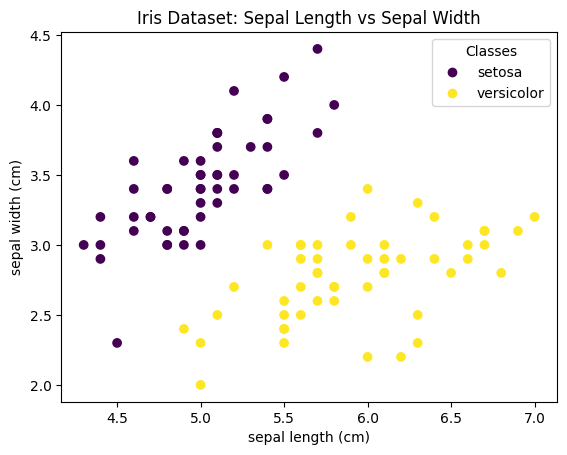

In [4]:
# Plot two classes for now based on just two features
# These classes and features were chosen since they should be easy to classify
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:100, 0], iris.data[:100, 1], c=iris.target[:100])
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
ax.set_title("Iris Dataset: Sepal Length vs Sepal Width")

In [5]:
# Iris dataset has 150 flowers, 50 per class
# Classes are types of irises: Setosa, Versicolour, and Virginica

# Data has 4 features (cols) per datapoint (rows):
# Sepal Length, Sepal Width, Petal Length and Petal Width

# FOR NOW, we only use sepal length and width
# Take only class 0 and 1 (each is 50 datapoints), not class 2

# Using a 35-15 train-test split
class0_data_train = iris.data[:35, :2]
class1_data_train = iris.data[50:85, :2]
class0_label_train = iris.target[:35]
class1_label_train = iris.target[50:85]

class0_data_test = iris.data[35:50, :2]
class1_data_test = iris.data[85:100, :2]
class0_label_test = iris.target[35:50]
class1_label_test = iris.target[85:100]

train_data = np.concatenate((class0_data_train, class1_data_train), axis=0)
train_labels = np.concatenate((class0_label_train, class1_label_train), axis=0)

test_data = np.concatenate((class0_data_test, class1_data_test), axis=0)
test_labels = np.concatenate((class0_label_test, class1_label_test), axis=0)

In [6]:
# Import packages
from sklearn.svm import SVC

# Create and train SVM with linear kernel
clf = SVC(kernel='linear')
clf.fit(train_data, train_labels)

SVC(kernel='linear')

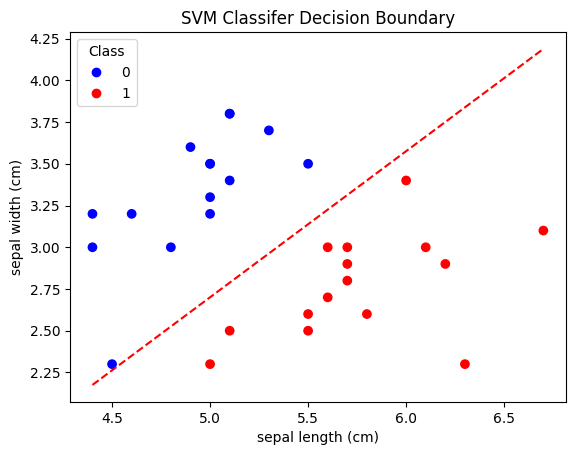

In [7]:
# Retrieve fitting params, index 0 for classes-1
# Weight vector (w1, w2) and bias term (b)
w = clf.coef_[0]
b = clf.intercept_[0]

# Distribute x coords in the range, calculate y coords
bound_x = np.linspace(test_data[:, 0].min(), test_data[:, 0].max(), 70)
bound_y = -(w[0] * bound_x + b) / w[1]

# Plot decision boundary and points
scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='bwr')
plt.plot(bound_x, bound_y, 'r--', label='Decision boundary')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("SVM Classifer Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

In [8]:
# Print accuracy
accuracy = clf.score(test_data, test_labels)
print(f"Testing accuracy: {accuracy:.3f}")

Testing accuracy: 1.000


In [8]:
# Print params in FULL precision for exporting
print(f"(w1, w2) = ({w[0]:.64f}, {w[1]:.64f})")
print(f"(b) = {b:.64f}")

(w1, w2) = (1.7964634897787892242604357306845486164093017578125000000000000000, -2.0530944464435600949059335107449442148208618164062500000000000000)
(b) = -3.4380803855330892560004940605722367763519287109375000000000000000


In [71]:
# Helper function to convert float to fixed point
def float_to_fixed(val):
  int_bits = 5
  frac_bits = 4
  total_bits = int_bits + frac_bits

  scale = 2**frac_bits
  max_val = (2**(int_bits + frac_bits - 1)) - 1
  min_val = -(2**(int_bits + frac_bits - 1))
  fixed = int(round(val * scale))

  # Saturate if out of range
  if fixed > max_val:
      fixed = max_val
  elif fixed < min_val:
      fixed = min_val

  # Convert to twos comp by masking
  twos_comp = fixed & ((1 << total_bits) - 1)
  twos_comp = format(twos_comp, f'0{total_bits}b')

  return twos_comp

In [64]:
def fixed_to_float(fixed, frac_bits=4):
    return fixed / (2**frac_bits)

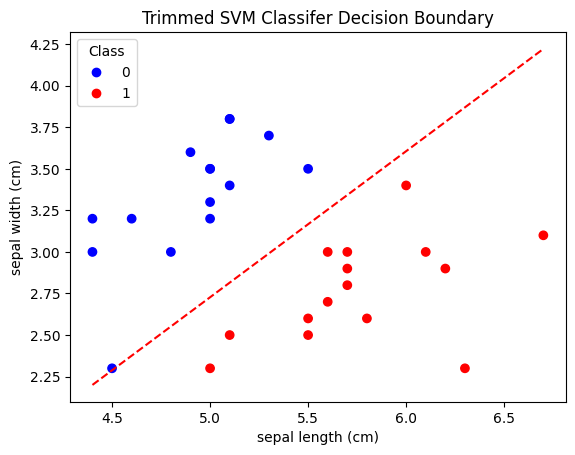

In [69]:
# Test necessary precision
# Retrieve fitting params, index 0 for classes-1
# Weight vector (w1, w2) and bias term (b)
w0_new = fixed_to_float(float_to_fixed(w[0]))
w1_new = fixed_to_float(float_to_fixed(w[1]))
b_new = fixed_to_float(float_to_fixed(b))

# Distribute x coords in the range, calculate y coords
bound_x = np.linspace(test_data[:, 0].min(), test_data[:, 0].max(), 70)
bound_y = -(w0_new * bound_x + b_new) / w1_new

# Plot decision boundary and points
scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='bwr')
plt.plot(bound_x, bound_y, 'r--', label='Decision boundary')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Trimmed SVM Classifer Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

In [73]:
# Print weights
print(f"'sb{float_to_fixed(w[0])};")
print(f"'sb{float_to_fixed(w[1])};")
print(f"'sb{float_to_fixed(b)};")

'sb000011101;
'sb111011111;
'sb111001001;


In [ ]:
test_data

array([[5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8]])

In [ ]:
# Generate Verilog for testbench
for i in test_data:
  print("#2;")
  print(f"x0 = 'b{float_to_fixed(i[0])};")
  print(f"x1 = 'b{float_to_fixed(i[1])};")
  print("")

In [ ]:
# Generate Verilog for testbench
for i in test_labels:
  print("#2")
  print(f"$display(\"Predicted: %0d, Expected: {i}\", label);")
  print("")

In [74]:
# NEW: Generate Verilog for testbench
for i in test_data:
  print(f"\"{float_to_fixed(i[0])}\"")

"001010000"
"001011000"
"001001110"
"001000110"
"001010010"
"001010000"
"001001000"
"001000110"
"001010000"
"001010010"
"001001101"
"001010010"
"001001010"
"001010101"
"001010000"
"001100000"
"001101011"
"001100101"
"001011010"
"001011000"
"001011000"
"001100010"
"001011101"
"001010000"
"001011010"
"001011011"
"001011011"
"001100011"
"001010010"
"001011011"


In [62]:
# NEW: Generate Verilog for testbench
for i in test_data:
  print(f"\"{float_to_fixed(i[1])}\"")

"0001101"
"0001110"
"0001110"
"0001100"
"0001110"
"0001110"
"0001001"
"0001101"
"0001110"
"0001111"
"0001100"
"0001111"
"0001101"
"0001111"
"0001101"
"0001110"
"0001100"
"0001001"
"0001100"
"0001010"
"0001010"
"0001100"
"0001010"
"0001001"
"0001011"
"0001100"
"0001100"
"0001100"
"0001010"
"0001011"
